<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/11324_Internet_images_fundus_laterality_VGG16_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
input = '/content/drive/MyDrive/Nornal internet findus photos'
output = '/content/drive/MyDrive/Nornal internet findus photos/split'

In [5]:
splitfolders.ratio(input, output,
                   seed=1337,
                   ratio=(0.8, 0.1, 0.1), group_prefix=None)


Copying files: 100 files [00:36,  2.73 files/s]


In [6]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split')

['train', 'val', 'test']

In [7]:
os.listdir('/content/drive/MyDrive/Nornal internet findus photos/split/train')


['RE fundus', 'LE fundus']

In [19]:
import keras
from keras.preprocessing.image import ImageDataGenerator

traindatagen = ImageDataGenerator(rescale=1/255)
valdatagen = ImageDataGenerator(rescale=1/255)
testdatagen = ImageDataGenerator(rescale=1/255)

In [20]:
train_images = traindatagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/train',
                                               target_size=(224,224))



validation_images = valdatagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/val',
                                                target_size=(224,224))


test_images = testdatagen.flow_from_directory('/content/drive/MyDrive/Nornal internet findus photos/split/test',
                                          target_size=(224,224))



Found 80 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [21]:
import keras
VGG = keras.applications.VGG16(include_top=False,
                               weights="imagenet",
                               input_shape=(224,224,3))
VGG.trainable=False


In [30]:
from keras.models import Sequential

model = keras.Sequential([
    VGG,
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(2, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21203778 (80.89 MB)
Trainable params: 6489090 (24.75 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [38]:
model.fit(train_images,
          batch_size=10,
          epochs=5,
          validation_data=validation_images)

model.save('funduslaterality_model.keras')

Epoch 1/5
3/3 [==============================] - 54s 15s/step - loss: 6.8239e-04 - accuracy: 1.0000 - val_loss: 0.4758 - val_accuracy: 0.8000
Epoch 2/5
3/3 [==============================] - 49s 15s/step - loss: 4.8343e-04 - accuracy: 1.0000 - val_loss: 0.5070 - val_accuracy: 0.8000
Epoch 3/5
3/3 [==============================] - 56s 17s/step - loss: 2.9806e-04 - accuracy: 1.0000 - val_loss: 0.5399 - val_accuracy: 0.8000
Epoch 4/5
3/3 [==============================] - 57s 17s/step - loss: 1.8408e-04 - accuracy: 1.0000 - val_loss: 0.5665 - val_accuracy: 0.8000
Epoch 5/5
3/3 [==============================] - 55s 18s/step - loss: 1.6212e-04 - accuracy: 1.0000 - val_loss: 0.5872 - val_accuracy: 0.8000


In [39]:
y_pred = model.predict(test_images)
y_pred

1/1 [==============================] - 5s 5s/step


array([[9.9999934e-01, 5.4139491e-07],
       [9.9998838e-01, 1.1551872e-05],
       [9.9537748e-01, 4.6224105e-03],
       [9.9998337e-01, 1.6531139e-05],
       [9.9979281e-01, 2.0710182e-04],
       [7.7341894e-05, 9.9992257e-01],
       [3.5271846e-04, 9.9964726e-01],
       [1.1753026e-05, 9.9998814e-01],
       [3.0823227e-04, 9.9969184e-01],
       [3.8609069e-04, 9.9961394e-01]], dtype=float32)

In [40]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [34]:
y_true = test_images.classes
y_true

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

In [41]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[5, 0],
       [0, 5]])

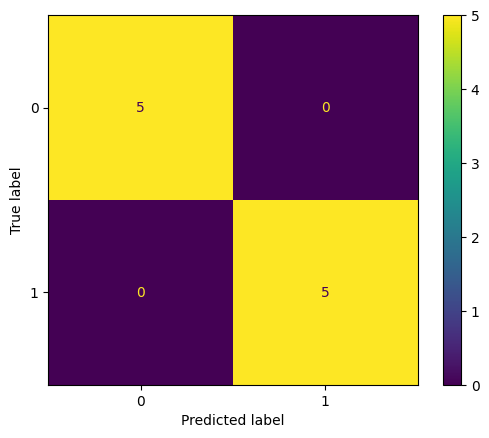

In [51]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

In [42]:
print(metrics.classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



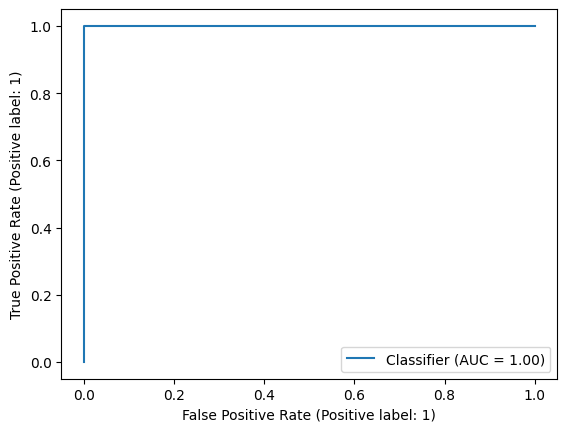

In [43]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred1)

1/1 [==============================] - 1s 617ms/step
Prediction: LE fundus


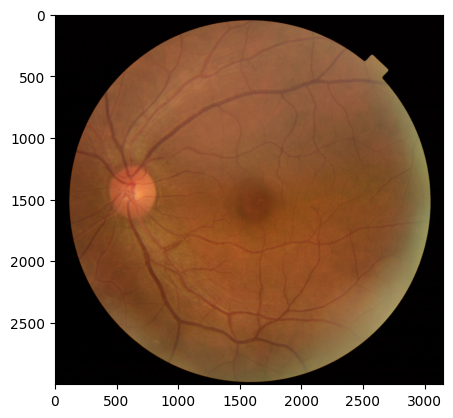

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('funduslaterality_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["LE fundus", "RE fundus" ]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/3324fundus laterality images/LE FUNDUS/1ffa9628-8d87-11e8-9daf-6045cb817f5b..JPG"
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/3324fundus laterality images/LE FUNDUS/1ffa9628-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)



1/1 [==============================] - 1s 1s/step
Prediction: RE fundus


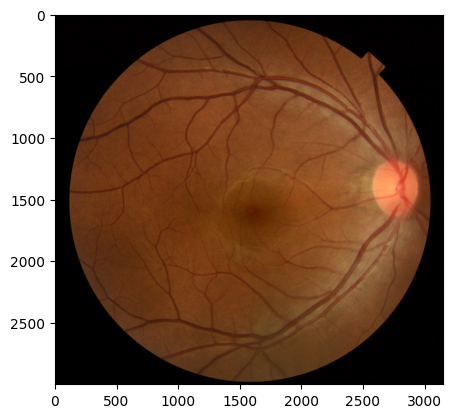

In [49]:
# Example usage
unknown_image_path = "/content/drive/MyDrive/3324fundus laterality images/RE FUNDUS/1ffa9642-8d87-11e8-9daf-6045cb817f5b..JPG"
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/3324fundus laterality images/RE FUNDUS/1ffa9642-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)



In [50]:
test_images.class_indices

{'LE fundus': 0, 'RE fundus': 1}